# Exploratory Data Analysis: AirNow

Fall 2020

Julia Longmate, Hikari Murayama, Michelle Sims, Marshall Worsham

In [33]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as cx

## About the Data
*Retrieval Link*: [Link](https://docs.airnowapi.org)

*Description*: AirNow is run by the US EPA and has a network of sensors across the United States. There are over 2000 sensors and data for parameters such as PM 2.5, PM 10, SO<sub>2</sub>, Ozone, NO<sub>2</sub>, and CO are collected. We've downloaded some hourly data for sensors across California. 


## Brief Description
### Sensor location

We first downloaded sensor locations for California from the API. The API code can be found in `00_Exploration_AirNow_FULL.py`.

In [2]:
sensor_loc = pd.read_csv('data/airnow_ca_sensors.csv')
sensor_loc.head()

,Unnamed: 0,index,SiteName,AgencyName,FullAQSCode,IntlAQSCode,geometry
0,0,0,Jacobs,North Coast Unified Air Quality Management Dis...,060231004,840060231004,POINT (-124.177498 40.776943)
1,1,5,Fort Bragg High School,Mendocino County AQMD,060450010,840060450010,POINT (-123.78766 39.43734)
2,2,6,Willits Justice Center,Mendocino County AQMD,060452002,840060452002,POINT (-123.352661 39.411743)
3,3,7,MMCA82038,California Air Resources Board,840MMCA82038,840840MMCA82038,POINT (-123.235896 38.907373)
4,4,8,Ukiah Library,Mendocino County AQMD,060450006,840060450006,POINT (-123.206528 39.150478)


In [3]:
sensor_loc.shape

(216, 7)

In [4]:
sensor_loc['AgencyName'].unique()

array(['North Coast Unified Air Quality Management District',
       'Mendocino County AQMD', 'California Air Resources Board',
       'San Francisco Bay Area AQMD', 'Siskiyou County APCD',
       'Shasta County Air Quality Management District',
       'Tehama County Air Pollution Control District',
       'Monterey Bay Unified APCD', 'Yolo-Solano AQMD',
       'National Park Service', 'Sacramento Metro. AQMD',
       'San Joaquin Valley Unified APCD', 'Placer County APCD',
       'Northern Sierra AQMD', 'San Luis Obispo County APCD',
       'Santa Barbara County Air Pollution Control District',
       'Tachi-Yokut Tribe', 'Ventura County  APCD',
       'Great Basin Unified Air Pollution Control District',
       'Forest Service', 'South Coast AQMD', 'Mojave Desert AQMD',
       'San Diego APCD', 'Twenty-Nine Palms Band of Mission Indians',
       'Imperial County Air Pollution Control District'], dtype=object)

We have 216 sensors across California. They come various agencies, which most likely correlates with their location.

## Example raw data
We extracted data by location, pinging the API for data for each month (this can also be found in`00_Exploration_AirNow_FULL.py`). Here is an example of a compiled csv for all data in one month.

In [10]:
df_2016_12 = pd.read_csv('output/air_now/raw/by_hour/2016-12-01_2016-12-31.csv',
                        dtype={'FullAQSCode': object,'IntlAQSCode': object})
df_2016_12.head()

,Unnamed: 0,Latitude,Longitude,UTC,Parameter,Unit,Value,RawConcentration,AQI,Category,SiteName,AgencyName,FullAQSCode,IntlAQSCode,date
0,18,40.776943,-124.177498,2016-12-01 00:00:00-08:00,NO2,PPB,6.00,6.17,6,1,Jacobs,North Coast Unified Air Quality Management Dis...,060231004,840060231004,2016-12-01
1,19,40.776943,-124.177498,2016-12-01 00:00:00-08:00,SO2,PPB,0.00,0.40,0,1,Jacobs,North Coast Unified Air Quality Management Dis...,060231004,840060231004,2016-12-01
2,20,40.776943,-124.177498,2016-12-01 00:00:00-08:00,CO,PPM,0.51,0.51,-999,0,Jacobs,North Coast Unified Air Quality Management Dis...,060231004,840060231004,2016-12-01
3,21,40.776943,-124.177498,2016-12-01 01:00:00-08:00,NO2,PPB,5.00,5.82,5,1,Jacobs,North Coast Unified Air Quality Management Dis...,060231004,840060231004,2016-12-01
4,22,40.776943,-124.177498,2016-12-01 01:00:00-08:00,SO2,PPB,0.00,0.37,0,1,Jacobs,North Coast Unified Air Quality Management Dis...,060231004,840060231004,2016-12-01


In [9]:
df_2016_12.describe()

,Unnamed: 0,Latitude,Longitude,Value,RawConcentration,AQI,Category
count,308190.000000,308190.000000,308190.000000,308190.000000,308190.000000,308190.000000,308190.000000
mean,1117.155745,36.259646,-119.874428,14.116841,-1.559637,-90.654424,0.993459
std,862.184306,2.056648,1.982119,16.828233,127.965605,322.013830,0.491424
min,0.000000,32.735500,-124.177498,-2.200000,-999.000000,-999.000000,0.000000
25%,429.000000,34.143900,-121.623271,3.900000,2.000000,5.000000,1.000000
50%,909.000000,36.458100,-120.075060,11.000000,9.400000,15.000000,1.000000
75%,1642.000000,37.950750,-118.068484,21.000000,22.000000,28.000000,1.000000
max,4410.000000,40.776943,-114.602090,978.200000,3922.100000,874.000000,6.000000


So this decribe is a little pointless so its for a couple different params. Let's just do this for Ozone.

In [15]:
df_2016_12.loc[df_2016_12['Parameter']=='OZONE'].describe()

,Unnamed: 0,Latitude,Longitude,Value,RawConcentration,AQI,Category
count,99581.000000,99581.000000,99581.000000,99581.000000,99581.000000,99581.000000,99581.000000
mean,969.439903,36.159679,-119.793945,18.761320,-13.362318,16.928691,0.999548
std,781.322152,2.055507,1.968752,11.695339,180.098644,24.152351,0.021253
min,0.000000,32.789561,-123.202995,-1.000000,-999.000000,-999.000000,0.000000
25%,367.000000,34.243132,-121.574684,9.000000,6.000000,8.000000,1.000000
50%,732.000000,36.209286,-120.040130,18.000000,18.600000,17.000000,1.000000
75%,1386.000000,37.938300,-118.127142,28.000000,30.000000,26.000000,1.000000
max,4406.000000,40.689400,-114.602090,49.000000,137.300000,45.000000,1.000000


We can see that we have some invalid cocentration measurements (-999 as null value). 

## Monthly average data

After compiling hourly data for 2016 through 2017, we took average measurements for each month for each sensor location (see `01_Monthly_Average_AIRNOW.py` to see details). Here is some brief EDA we did to understand our data.

In [16]:
airnow_monthly = gpd.read_file('output/air_now/airnow_monthly_averages.json/airnow_monthly_averages.shp')
airnow_monthly.head()

,Latitude,Longitude,Parameter,Unit,Category,SiteName,AgencyName,FullAQSCod,IntlAQSCod,year,month,Value_mean,Value_coun,RawConcent,RawConce_1,AQI_mean,AQI_count,geometry
0,32.7355,-116.3454,PM10,UG/M3,0,Manzanita Tribe 1,Manzanita Band of the Kumeyaay Nation,60732000,840060732000,2016,1,-0.150000,2,0.000000,2,NaN,0,POINT (-116.34540 32.73550)
1,32.7355,-116.3454,PM10,UG/M3,1,Manzanita Tribe 1,Manzanita Band of the Kumeyaay Nation,60732000,840060732000,2016,1,2.933515,734,2.922131,732,2.750681,734,POINT (-116.34540 32.73550)
2,32.7355,-116.3454,PM10,UG/M3,1,Manzanita Tribe 1,Manzanita Band of the Kumeyaay Nation,60732000,840060732000,2016,2,5.725291,3440,5.867347,3430,5.306686,3440,POINT (-116.34540 32.73550)
3,32.7355,-116.3454,PM10,UG/M3,1,Manzanita Tribe 1,Manzanita Band of the Kumeyaay Nation,60732000,840060732000,2016,3,7.577446,2944,7.586957,2944,7.009511,2944,POINT (-116.34540 32.73550)
4,32.7355,-116.3454,PM10,UG/M3,1,Manzanita Tribe 1,Manzanita Band of the Kumeyaay Nation,60732000,840060732000,2016,4,11.366199,2139,11.404494,2136,10.531557,2139,POINT (-116.34540 32.73550)


In [51]:
airnow_monthly.columns

Index(['Latitude', 'Longitude', 'Parameter', 'Unit', 'Category', 'SiteName',
       'AgencyName', 'FullAQSCod', 'IntlAQSCod', 'year', 'month', 'Value_mean',
       'Value_coun', 'RawConcent', 'RawConce_1', 'AQI_mean', 'AQI_count',
       'geometry'],
      dtype='object')

### Sensor types
We wanted to see how much of the network was made up of sensors designated for detecting different parameters.

Ozone sensors are most prevalent, with the next being PM 2.5 sensors.

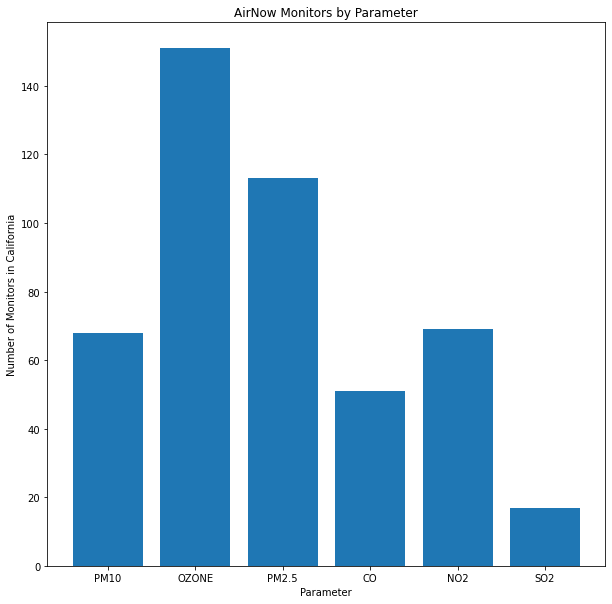

In [32]:
# Create labels for pie chart
labels = airnow_monthly['Parameter'].unique()
# Find the number of unique locations there are that measure this parameter
sizes = [len(airnow_monthly.loc[airnow_monthly['Parameter']==i,'SiteName'].unique()) for i in airnow_monthly['Parameter'].unique()]

# Create bar chart
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(labels,height=sizes)
ax.set_xlabel('Parameter')
ax.set_ylabel('Number of Monitors in California')
ax.set_title('AirNow Monitors by Parameter')
plt.show()

## Sensor locations

Our sensors seem to be clustered in more urban areas and are sparser in rural regions (where methane data is needed).

Text(0.5, 1.0, 'AirNow monitors across California')

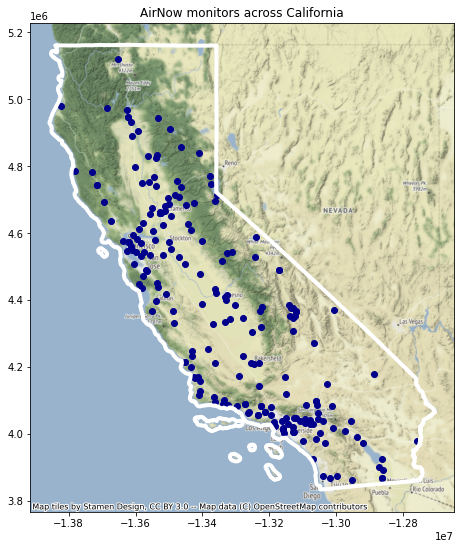

In [50]:
# Bring in California outline
ca_gpd = gpd.read_file('zip://data/ca-state-boundary.zip')

# Add all Air Now monitors on plot
airnow_monthly_locs = airnow_monthly[['SiteName','geometry']].drop_duplicates()

ax = airnow_monthly_locs.to_crs('EPSG:3857').plot(figsize=(9, 9), color='darkblue')
ca_gpd.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='white',linewidth=4, ax=ax)
# Add a base map
cx.add_basemap(ax)
ax.set_title('AirNow monitors across California')

## Parameter statistics

It seems that NO2 concentrations increase in 2017, while Ozone concentrations remain about the same. 

In [57]:
airnow_monthly.groupby(['year','Parameter', 'Unit']).agg({'Value_mean': ['mean']})

Value_mean
                           mean
year Parameter Unit            
2016 CO        PPM     0.364495
     NO2       PPB    13.244315
     OZONE     PPB    47.063055
     PM10      UG/M3  76.284838
     PM2.5     UG/M3  11.925440
     SO2       PPB     5.817451
2017 CO        PPM     0.357774
     NO2       PPB    18.366278
     OZONE     PPB    48.073824
     PM10      UG/M3  85.188276
     PM2.5     UG/M3  17.827011
     SO2       PPB     3.997960